In [2]:
import pandas as pd
from pathlib import Path

base_path = Path('/data/blockchain-interoperability/blockchain-social-media/twitter-data/')
timestamp = pd.to_datetime(pd.read_pickle(base_path / 'snapshots/timestamp_ms.pkl'),unit='ms')

/tmp/ipykernel_23222/781870885.py:5: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  timestamp = pd.to_datetime(pd.read_pickle(base_path / 'snapshots/timestamp_ms.pkl'),unit='ms')


In [68]:
df = pd.DataFrame({'timestamp':timestamp})

count_per_ts = pd.DataFrame([
    {
        # 'timestamp': pd.to_datetime(ts).strftime('%Y-%m-%d'),
        'timestamp': ts,
        'count': len(gr)
    }
    for ts, gr in df.resample('12H', on='timestamp')
])

In [76]:
count_per_ts['timestamp'].dtype , pd.to_datetime(count_per_ts['timestamp']).dtype


(dtype('<M8[ns]'), dtype('<M8[ns]'))

<BarContainer object of 50 artists>

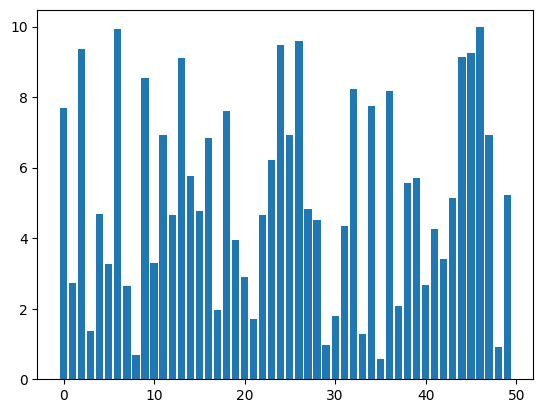

In [86]:
import numpy as np
plt.bar(
    x = np.arange(50),
    height = np.random.random(50) * 10
)

In [99]:
count_per_ts['timestamp'].dt.str

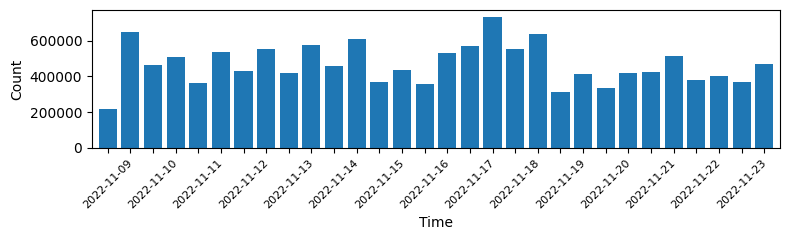

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig,ax = plt.subplots(figsize=(8,2.5))

ax.bar(
    # x=count_per_ts['timestamp'].values,
    x = count_per_ts.index,
    height=count_per_ts['count'],
)

ax.set_xticks(
    # count_per_ts['timestamp'].dt.strftime('%Y-%m-%d'),
    count_per_ts.index
)
ax.set_xticklabels(
    count_per_ts['timestamp'].dt.strftime('%Y-%m-%d'),
)
ax.set_xlabel('Time')
ax.set_ylabel('Count')

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

plt.xticks(rotation=45, fontsize=8)

plt.margins(x=0.01)

fig.tight_layout()

fig.savefig('../plots/data_collection/tweet_volumes.pdf', bbox_inches='tight')